In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
# Helper Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

2024-06-18 16:04:31.822176: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-18 16:04:31.872706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 16:04:31.872743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 16:04:31.873844: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-18 16:04:31.882119: I tensorflow/core/platform/cpu_feature_guar

In [3]:
data_df = pd.read_csv('wine.csv', header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


describe only shows number value

In [5]:
data_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
for col in data_df.columns:
    print (f'{col}' , data_df[col].unique())

0 [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
1 [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.7  1.97 1.43 0

In [8]:
data_df.columns[-1]

13

In [9]:
data_df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


# row 13 is delete and 1 column add

In [10]:
# labels_df = data_df[data_df.columns[-1]]
# features_df = data_df.drop(data_df.columns[-1])
# features_df.shape, labels_df.shape

In [11]:
# features_df.head(20)

axis =1 is coloumn

In [12]:
labels_df = data_df[data_df.columns[-1]]
features_df = data_df.drop(data_df.columns[-1], axis = 1)
features_df.shape, labels_df.shape

((178, 13), (178,))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, 
                                                    test_size=0.2, 
                                                    stratify = labels_df,
                                                    random_state=42)


type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [15]:
le.classes_

array([1, 2, 3])

In [16]:
le.classes_[1]

2

In [17]:
np.unique(y_train)

array([0, 1, 2])

In [18]:
# model = tf.keras.Sequential?

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(13,))) # same as cols in X_train
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(3)) # same as num classes

2024-06-18 16:04:35.583728: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


input node = total column,

output node = 3 classes

In [20]:
# model.compile?

In [21]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy'])

In [22]:
# model.fit?

In [23]:
history = model.fit(x=X_train,y=y_train,
    epochs=200,
    verbose='auto',
    validation_data=[X_test, y_test])

Epoch 1/200
5/5 [==============================] - 1s 58ms/step - loss: 1.3445 - accuracy: 0.3521 - val_loss: 1.4626 - val_accuracy: 0.2500
Epoch 2/200
5/5 [==============================] - 0s 12ms/step - loss: 1.2983 - accuracy: 0.3803 - val_loss: 1.4123 - val_accuracy: 0.2500
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 1.2537 - accuracy: 0.3873 - val_loss: 1.3652 - val_accuracy: 0.2500
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 1.2109 - accuracy: 0.4085 - val_loss: 1.3195 - val_accuracy: 0.2500
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 1.1723 - accuracy: 0.4225 - val_loss: 1.2752 - val_accuracy: 0.2778
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 1.1360 - accuracy: 0.4577 - val_loss: 1.2326 - val_accuracy: 0.3333
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 1.0985 - accuracy: 0.4789 - val_loss: 1.1921 - val_accuracy: 0.3889
Epoch 8/200
5/5 [===

In [24]:
loss_df = pd.DataFrame(history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,1.344457,0.352113,1.462594,0.250000
1,1.298329,0.380282,1.412296,0.250000
2,1.253687,0.387324,1.365220,0.250000
3,1.210911,0.408451,1.319494,0.250000
4,1.172279,0.422535,1.275187,0.277778
...,...,...,...,...
195,0.027495,0.992958,0.127812,0.944444
196,0.027218,1.000000,0.127333,0.944444
197,0.026933,1.000000,0.126902,0.944444
198,0.026725,1.000000,0.126948,0.944444


<Axes: >

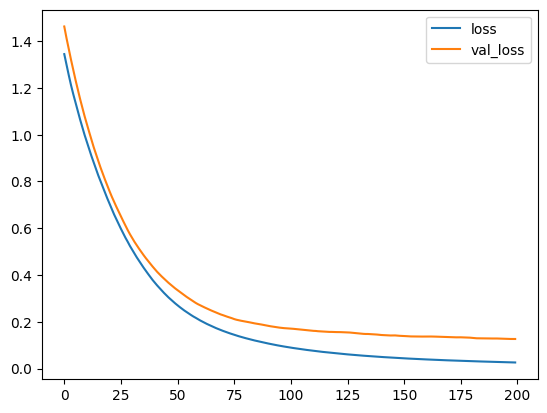

In [25]:
loss_df[['loss','val_loss']].plot()

<Axes: >

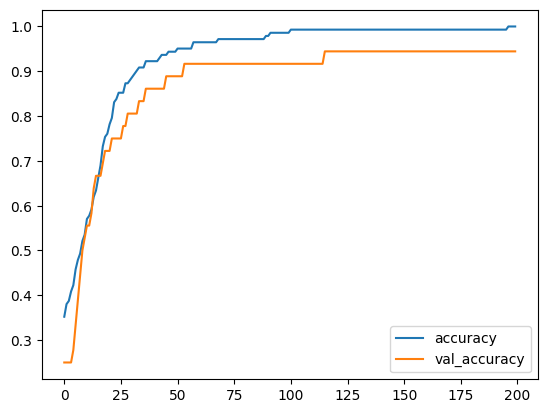

In [26]:
loss_df[['accuracy','val_accuracy']].plot()

In [31]:
y_pred.shape,  y_train.shape

((142, 3), (142,))

In [36]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_train)
y_pred = y_pred.argmax(axis = 1)
accuracy_score(y_train, y_pred)

5/5 [==============================] - 0s 2ms/step


1.0

In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

